In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import subprocess
import random
from tqdm import tqdm
from data_loader_all import load_dataset

> This Code creates DataFrame with the columns:
- classfication (name of the image folder)
- image_path

In [183]:

# Path to the dataset directory
dataset_dir = 'data/PlantVillage/'

# Function to load images and labels using OpenCV
def load_dataset(dataset_path):
    data_dict = {}
    # Walk through the dataset directory
    for root, dirs, files in os.walk(dataset_path):
        for dir_name in dirs:
            # Initialize an empty list for each subfolder
            data_dict[dir_name] = []

            # Get the full path to the subfolder
            subfolder_path = os.path.join(root, dir_name)

            # Iterate through the files in the subfolder
            for file in os.listdir(subfolder_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Construct the full path to the image
                    image_path = os.path.join(subfolder_path, file)

                    # Load the image using OpenCV
                    image = cv2.imread(image_path)
                    # Convert from BGR to RGB color space
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    # Append the image to the list associated with the subfolder name
                    data_dict[dir_name].append(image)
    data = [(classification, path) for classification, paths in data_dict.items() for path in paths]
    df = pd.DataFrame(data, columns=['classification', 'image'])
    return df

# Load your dataset
df = load_dataset(dataset_dir)


> Lets keep the tomatos images only

In [184]:
for label in df.classification.unique():
    if 'tomato' in label.lower():
        print(label)

Tomato_healthy
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Early_blight
Tomato__Target_Spot
Tomato_Leaf_Mold
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Septoria_leaf_spot
Tomato__Tomato_mosaic_virus
Tomato_Bacterial_spot
Tomato_Late_blight


In [185]:
tomato_data = df.loc[df['classification'].str.contains('Tomato')]
tomato_data.shape

(16011, 2)

> Sample from each classification 

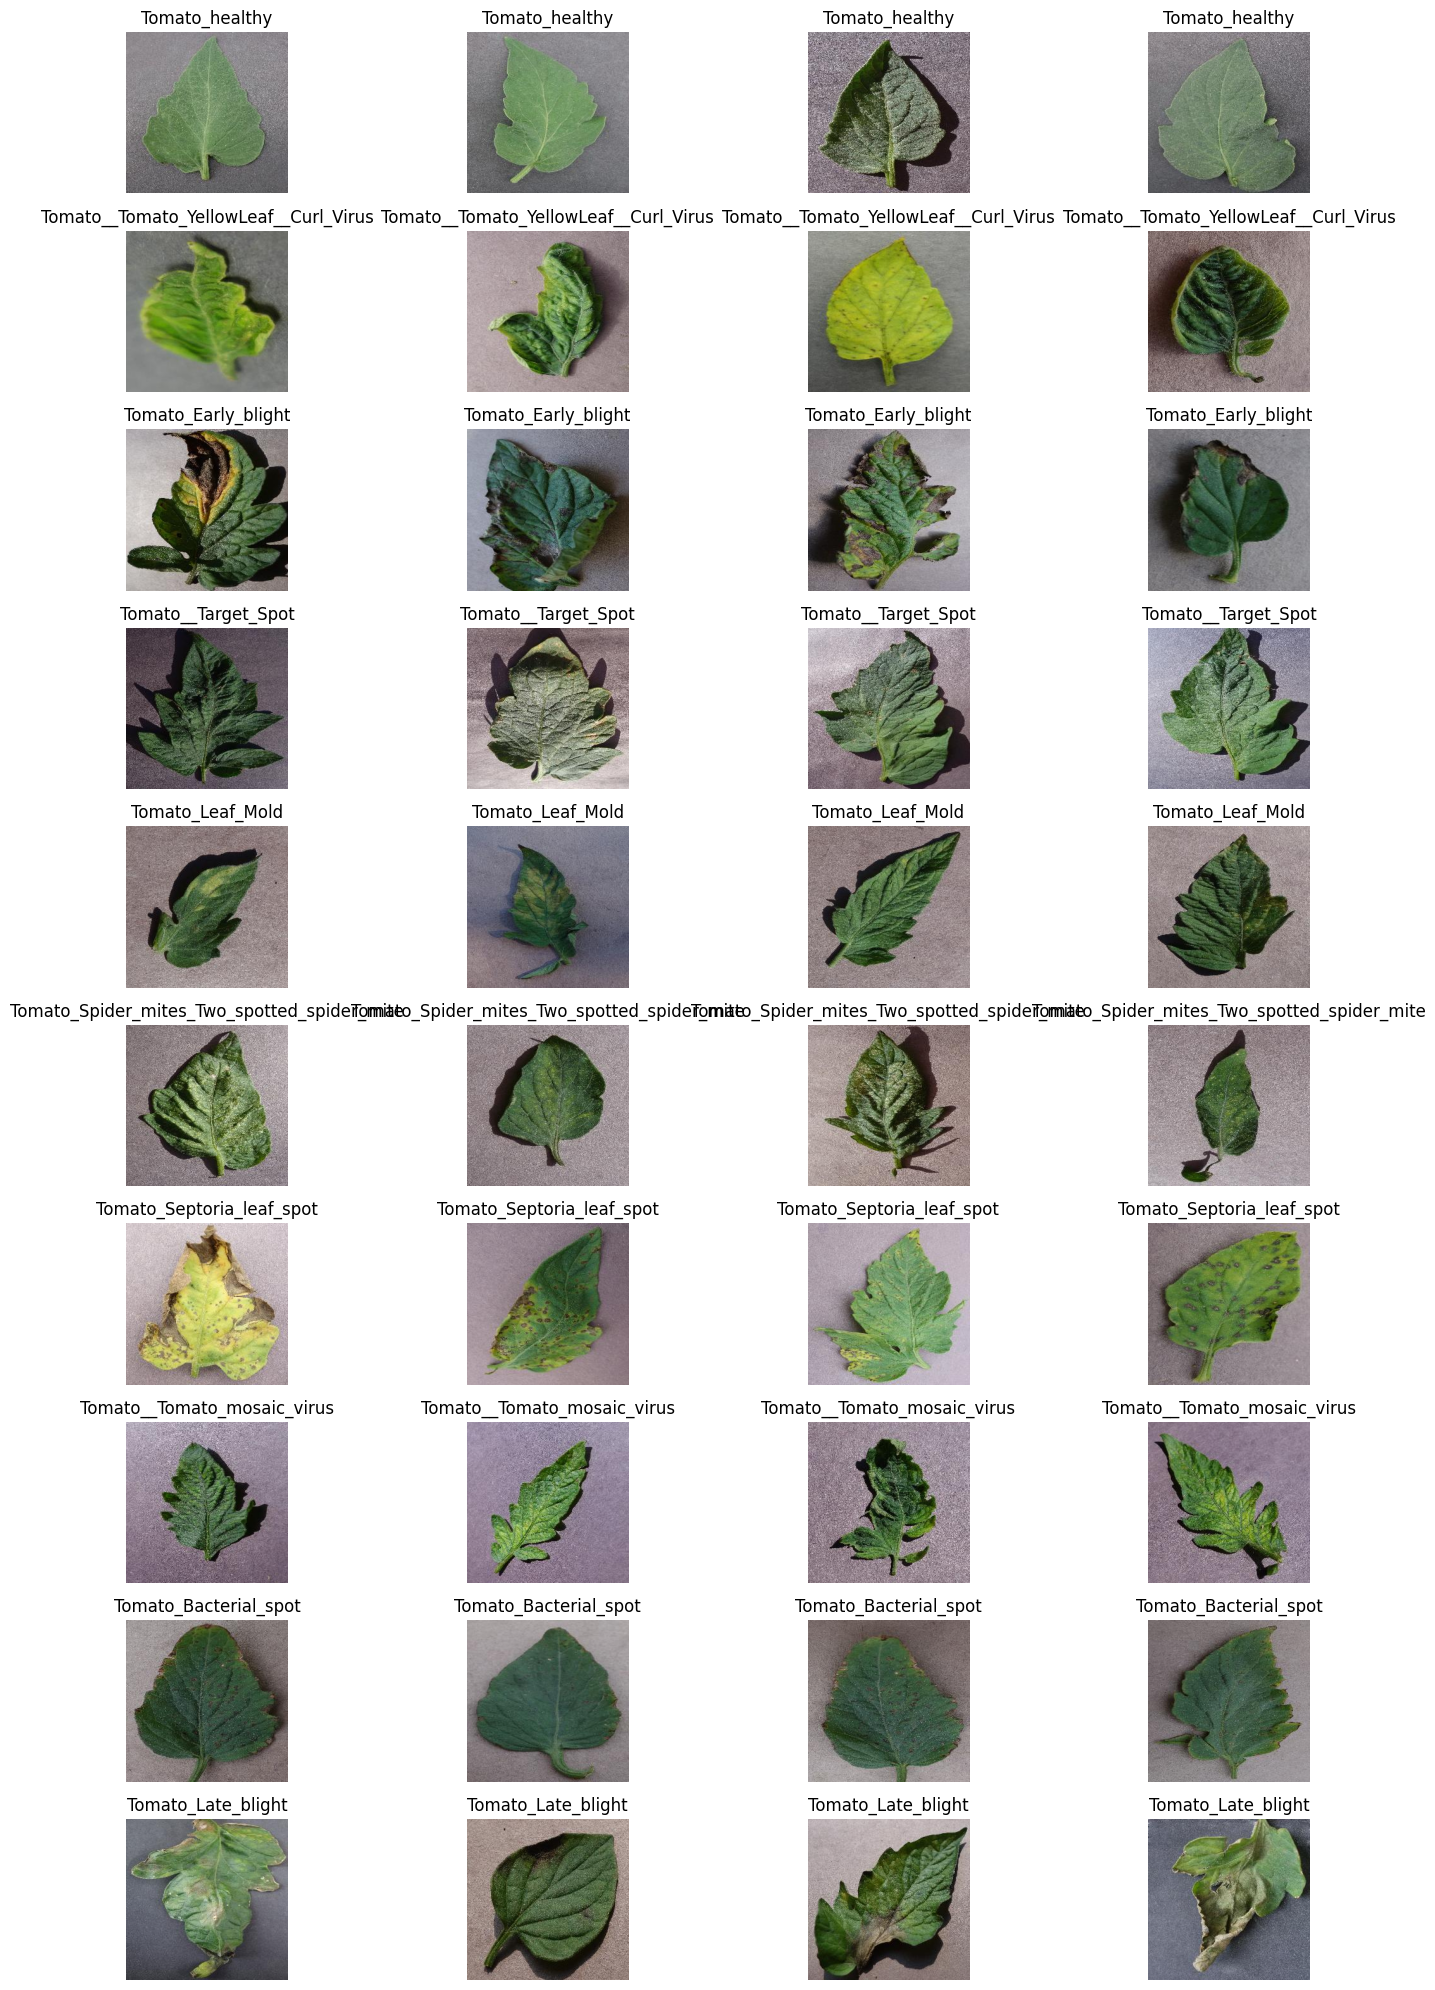

In [186]:
num_images_per_class = 4
images_to_display = []
titles = []
for label in tomato_data.classification.unique():
    label_sample = tomato_data.loc[tomato_data.classification == label].sample(num_images_per_class).image.to_list()
    images_to_display += label_sample
    titles += [label]*num_images_per_class



fig, axes = plt.subplots(nrows=len(tomato_data.classification.unique()), ncols=num_images_per_class, figsize=(15, 20))  
for ax, image, title in zip(axes.flatten(), images_to_display, titles):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

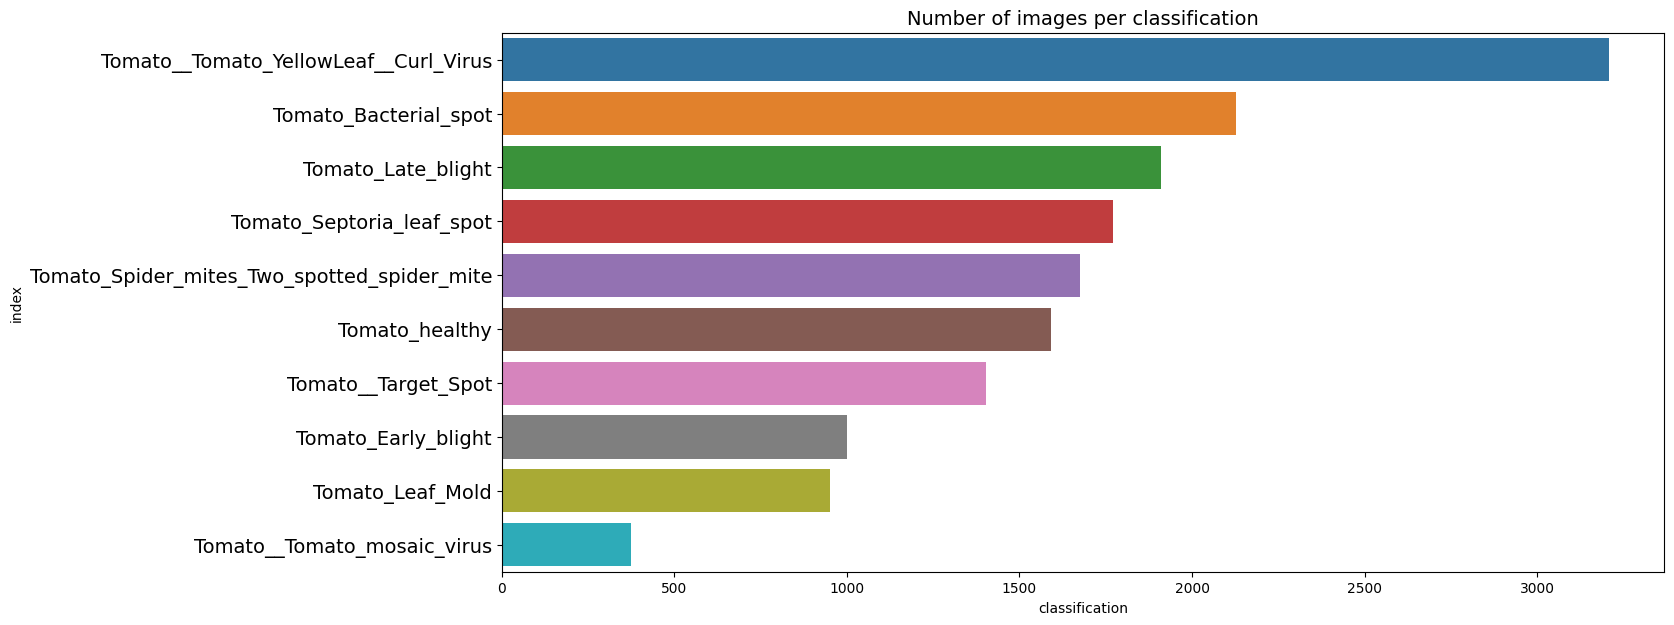

In [187]:
ax, fig = plt.subplots(figsize=(15,7))
sns.barplot(tomato_data.classification.value_counts().reset_index(), y='index', x='classification')
plt.yticks(fontsize=14)
plt.title("Number of images per classification", fontsize=14)
plt.show()

> Check weather the images resolution are unique

In [188]:
tomato_data['image_shape'] = tomato_data.image.apply(lambda x: x.shape)
    
print(f"The image resolution we have in the dataset are : {tomato_data.image_shape.unique()}")

The image resolution we have in the dataset are : [(256, 256, 3)]


In [189]:
segmented_data_root_folder = 'data/segmented_data/'
number_of_images_to_segment = 300

for root, dirs, files in os.walk(dataset_dir):
    for dir_name in dirs:
        if 'tomato' in dir_name.lower():
            subfolder_path = os.path.join(root, dir_name)
            destination_directory = os.path.join(segmented_data_root_folder, dir_name)
            os.makedirs(destination_directory, exist_ok=True)
            
            dir_files = os.listdir(subfolder_path)
            random_files = random.sample(dir_files, min(number_of_images_to_segment, len(dir_files)))
        else: continue
        for file in random_files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subfolder_path, file)
                command = [
                        "python3", "leaf-image-segmentation/segment.py",
                        "-d", destination_directory,
                        "-f", "flood",  
                        image_path
                    ]
                subprocess.run(command)


Marker generated for image file:  6fc5b781-6757-459f-af96-09a67dbcb2bc___RS_HL 0607.JPG
Marker generated for image file:  abab2c83-54cb-4427-b239-7f55be4d7f78___RS_HL 9709.JPG
Marker generated for image file:  5d5b9f07-dd6a-4927-9ca0-92945e9ad8df___GH_HL Leaf 209.1.JPG
Marker generated for image file:  e30f24b2-c298-4853-8fda-9e67b3738a55___GH_HL Leaf 287.JPG
Marker generated for image file:  2b03b88c-5299-4c2c-8e7f-c40fbd98e145___RS_HL 0104.JPG
Marker generated for image file:  ec754608-21ce-40be-abd0-46a664257065___RS_HL 0376.JPG
Marker generated for image file:  3b4a011c-68ae-4b84-90b5-27ef4b2d3447___GH_HL Leaf 255.JPG
Marker generated for image file:  98e0a217-023f-45ad-a1b7-3719a5fdea49___GH_HL Leaf 283.JPG
Marker generated for image file:  2eb4a2fa-d41e-47f1-9e3f-e49035c5b24a___RS_HL 9995.JPG
Marker generated for image file:  91a223de-d549-43cd-8ffe-81b650b28edd___RS_HL 0028.JPG
Marker generated for image file:  66534b5a-a6b7-46bb-bc09-a6bba9d9a61a___GH_HL Leaf 225.2.JPG
Marker g

In [3]:
segmented_data = load_dataset('data/segmented_data/')
segmented_data_dict = [(classification, image) for classification, images in segmented_data.items() for image in images]
segmented_data_df = pd.DataFrame(segmented_data_dict, columns=['classification', 'image'])

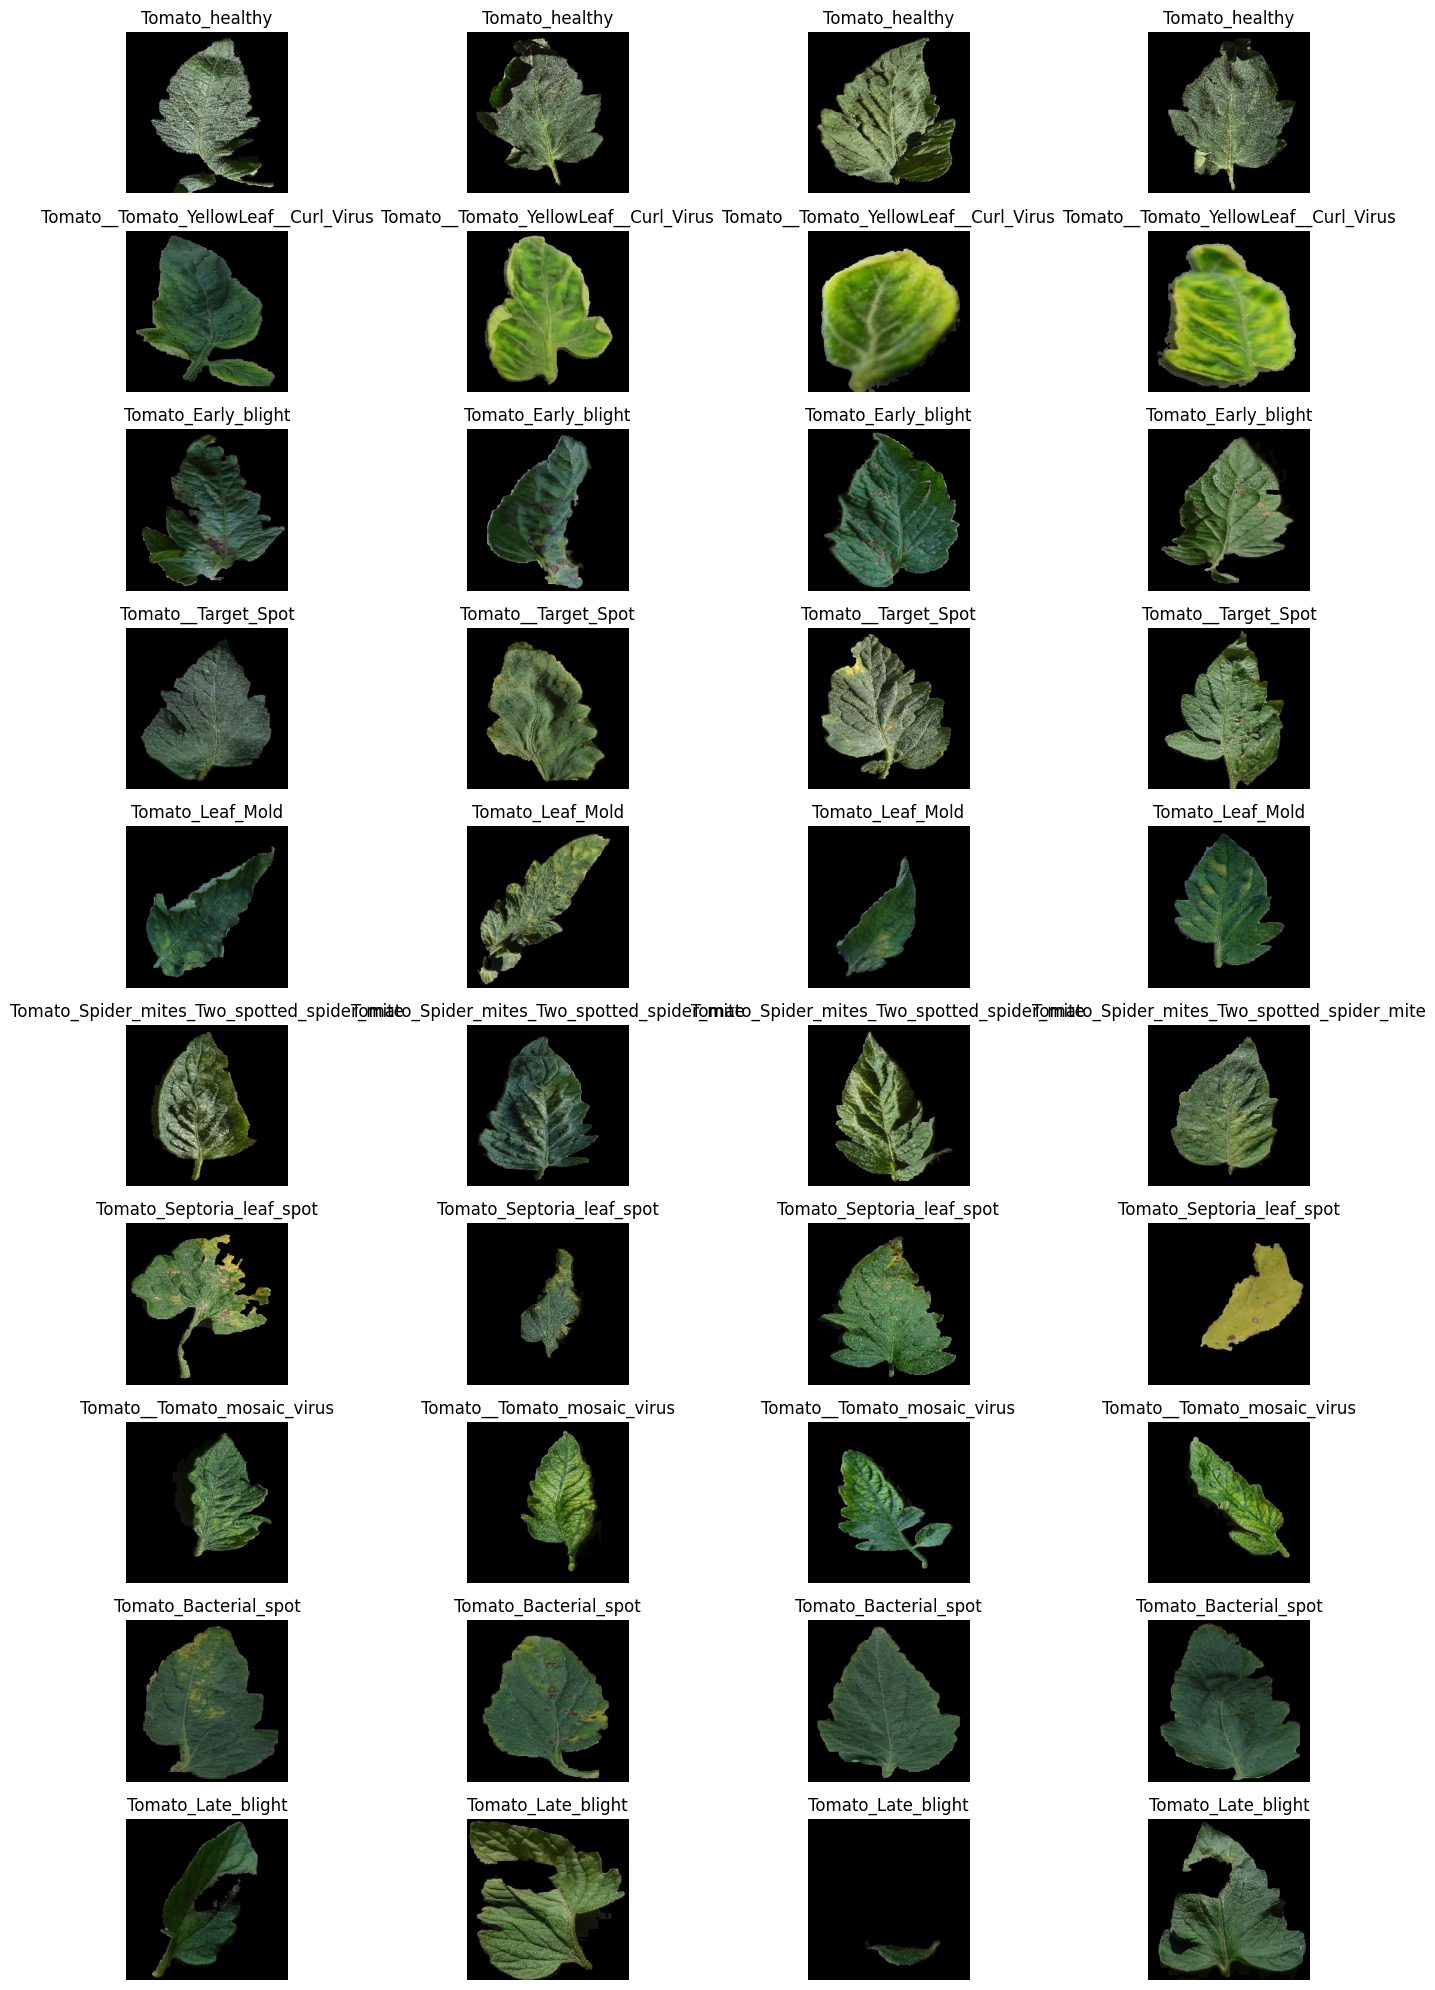

In [202]:
num_images_per_class = 4
images_to_display = []
titles = []
for label in segmented_data_df.classification.unique():
    label_sample = segmented_data_df.loc[segmented_data_df.classification == label].sample(num_images_per_class).image.to_list()
    images_to_display += label_sample
    titles += [label]*num_images_per_class



fig, axes = plt.subplots(nrows=len(segmented_data_df.classification.unique()), ncols=num_images_per_class, figsize=(15, 20))  
for ax, image, title in zip(axes.flatten(), images_to_display, titles):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
def convert_rgb_to_hsv(rgb_image):
    # Convert the RGB image to HSV
    return cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

# Apply the conversion function to each image in the DataFrame
segmented_data_df['hsv_image'] = segmented_data_df['image'].apply(convert_rgb_to_hsv)

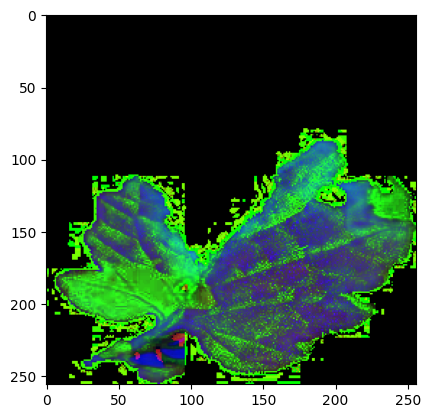

In [14]:
plt.imshow(segmented_data_df.hsv_image.iloc[600])

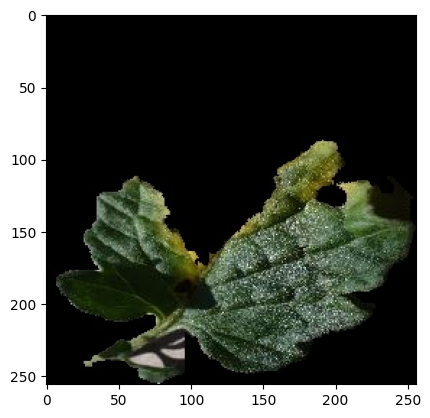

In [12]:
plt.imshow(segmented_data_df.hsv_image.iloc[600])


In [ ]:
segmented_data_df.hsv_image.iloc.reshape(-1, 3)

In [8]:
from sklearn.cluster import KMeans

pixels = segmented_data_df.hsv_image.iloc[0].reshape(-1, 3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)



KMeans(n_clusters=3)